In [3]:
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
# from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

In [6]:
file = "HFI_ScanBeam_143-1a_R2.00.fits"

In [7]:

hdulist = fits.open(file)
primary_header = hdulist[0].header

hdr =  hdulist[0].header
list(hdr.keys()) 
data = hdulist[0].data
print(list(hdr.keys()) )

hdulist.close()
print(primary_header)

['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'COMMENT', 'COMMENT', 'COMMENT', 'EXTNAME', 'BOLO', 'XCTR', 'YCTR', 'DELTAX', 'DELTAY', 'REF', 'FILENAME', 'PROCVER', 'COMMENT', 'COMMENT', 'COMMENT', 'COMMENT', 'COMMENT']
SIMPLE  =                    T / Written by IDL:  Wed Feb  4 20:12:20 2015      BITPIX  =                  -64 / Number of bits per data pixel                  NAXIS   =                    2 / Number of data axes                            NAXIS1  =                 6001 /                                                NAXIS2  =                 6001 /                                                COMMENT                                                                         COMMENT  *** Planck params ***                                                  COMMENT                                                                         EXTNAME = 'BEAM    '           / Beam, normalized                               BOLO    = '143-1a  '           / Bolometer name          

In [8]:
beam = data

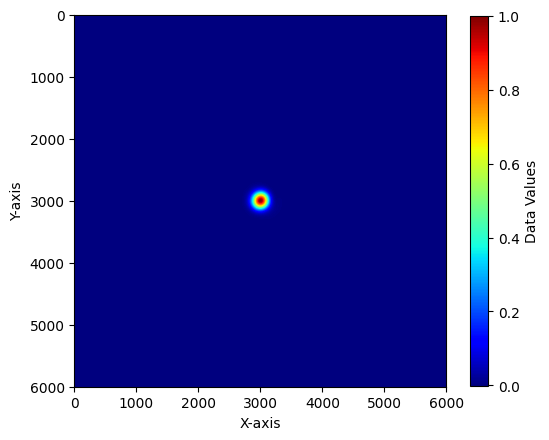

In [9]:
fig = plt.figure(figsize=(6, 6))  

plt.imshow(data, cmap='jet')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.colorbar(label='Data Values', shrink=0.8, location='right')

plt.show()

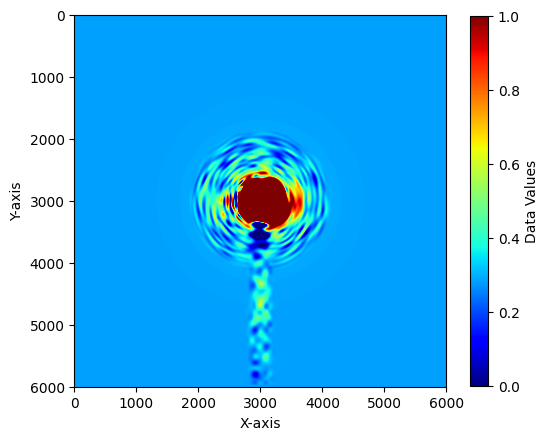

In [10]:
zscale = ZScaleInterval()



fig = plt.figure(figsize=(6, 6))

normalized_data = zscale(beam)

plt.imshow(normalized_data, cmap='jet')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')


plt.colorbar(label='Data Values', shrink=0.8, location='right')

plt.show()

In [8]:


max_index = np.argmax(beam)


row_index = max_index // beam.shape[1]
col_index = max_index % beam.shape[1]

print("Coordinates of maximum value:", (row_index, col_index))

Coordinates of maximum value: (3000, 3002)


In [9]:
# # in pixel coordinate
# x = np.linspace(-3000,3001,6001)
# y = np.linspace(-3000,3001,6001) 
# z = beam

# f = RegularGridInterpolator((y,x), z, method='linear')  
# xnew = np.linspace(-3000,3001,6001)
# ynew = np.linspace(-3000,3001,6001)
# xx, yy = np.meshgrid(xnew, ynew)
# znew = f((yy,xx))

In [10]:
# in arc min
x = (2/60)*np.linspace(-3000,3001,6001)
y = (2/60)*np.linspace(-3000,3001,6001) 
z = beam

f = RegularGridInterpolator((y,x), z, method='linear')  
xnew = (2/60)*np.linspace(-3000,3001,6001)
ynew = (2/60)*np.linspace(-3000,3001,6001)
xx, yy = np.meshgrid(xnew, ynew)
znew = f((yy,xx))

In [11]:
np.savetxt("grid.txt",znew)

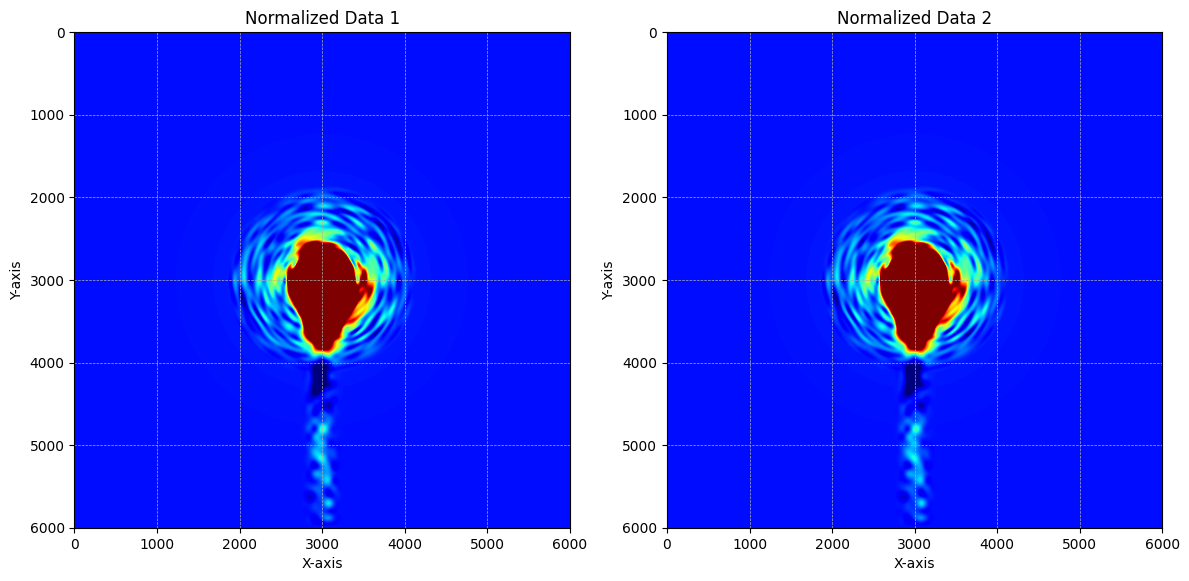

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 12))  # Create a figure with 3 subplots

normalized_data1 = zscale(z)
normalized_data2 = zscale(znew)

axs[0].imshow(normalized_data1, cmap='jet')
axs[0].set_title('Normalized Data 1')
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')


axs[1].imshow(normalized_data2, cmap='jet')
axs[1].set_title('Normalized Data 2')
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')

plt.tight_layout()  

plt.show()


/tmp/ipykernel_52812/899792994.py:19: RuntimeWarning: invalid value encountered in log10
  log_data = np.log10(data + epsilon)


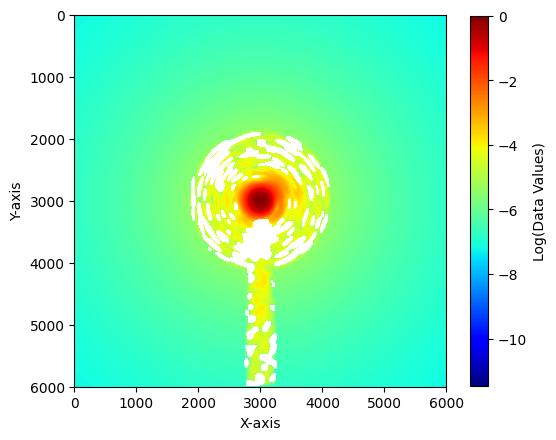

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Open the FITS file
file = "HFI_ScanBeam_143-4a_R2.00.fits"
hdulist = fits.open(file)

# Extract the primary header and data
primary_header = hdulist[0].header
hdr = hdulist[0].header
data = hdulist[0].data

# Close the FITS file
hdulist.close()

# Take the logarithm of the data, avoiding log(0) by adding a small value (epsilon)
epsilon = 1e-10  # A small value to avoid log of zero
log_data = np.log10(data + epsilon)

# Plot the logarithmic data
fig = plt.figure(figsize=(6, 6))  

plt.imshow(log_data, cmap='jet')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar(label='Log(Data Values)', shrink=0.8, location='right')

plt.show()


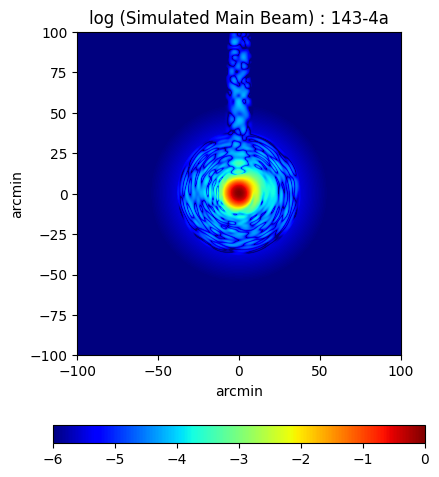

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Open the FITS file
file = "HFI_ScanBeam_143-1a_R2.00.fits"
hdulist = fits.open(file)

# Get the header and data
primary_header = hdulist[0].header
hdr = hdulist[0].header
data = hdulist[0].data

# Close the FITS file
hdulist.close()

# Apply logarithmic scaling to the data (handling negative or zero values)
log_data = np.log10(np.abs(data))  # Add small value to avoid log10(0)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Define the extent of the plot in arcminutes (100 arcmin total: -50 to 50)
extent = [-100, 100, -100, 100]  # Adjust according to your data range

# Plot the data using imshow with proper scaling and the extent in arcminutes
im = ax.imshow(log_data, cmap='jet', origin='lower', extent=extent)

# Add contours to the plot with appropriate levels
# contour_levels = np.linspace(-2, 4, 100)  # Adjust contour levels based on your data range
# contours = ax.contour(log_data, levels=contour_levels, colors='black', linewidths=0.5, extent=extent)

# Add labels to the contours
# ax.clabel(contours, inline=True, fontsize=8)

# Set the labels and title
ax.set_xlabel('arcmin')
ax.set_ylabel('arcmin')
ax.set_title('log (Simulated Main Beam) : 143-4a')

# Add a colorbar with appropriate scaling
cbar = plt.colorbar(im, ax=ax, shrink=0.8, location='bottom')
# cbar.set_label('Log10 of Data Values')

# Set colorbar limits (match the desired scale)
im.set_clim(-6, 0)

# Show the plot
plt.show()


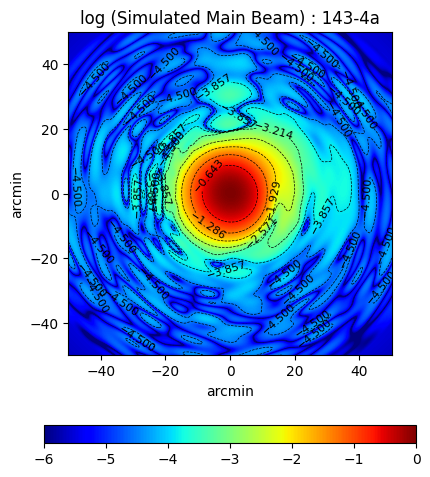

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Open the FITS file
file = "HFI_ScanBeam_143-1a_R2.00.fits"
hdulist = fits.open(file)

# Get the header and data
primary_header = hdulist[0].header
hdr = hdulist[0].header
data = hdulist[0].data

# Close the FITS file
hdulist.close()

# Apply logarithmic scaling to the data (handling negative or zero values)
log_data = np.log10(np.abs(data))  # Add small value to avoid log10(0)

# Calculate the number of pixels
nx, ny = log_data.shape

# Define pixel size in arcminutes (2 arcseconds per pixel, 1 arcminute = 60 arcseconds)
pixel_size_arcmin = 2 / 60

# Calculate the number of pixels corresponding to 30 arcminutes (half of 60 arcmin)
arcmin_to_pixels = int(30 / pixel_size_arcmin)  # 30 arcminutes to pixels

# Calculate the central region (900x900 pixels)
x_center = nx // 2
y_center = ny // 2
trimmed_log_data = log_data[x_center - arcmin_to_pixels:x_center + arcmin_to_pixels, 
                            y_center - arcmin_to_pixels:y_center + arcmin_to_pixels]

# Calculate the new extent for the trimmed region
extent = [-50, 50, -50, 50]  # Extent in arcminutes for the central 60 arcmin region

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the trimmed data using imshow with proper scaling and the new extent in arcminutes
im = ax.imshow(trimmed_log_data, cmap='jet', origin='lower', extent=extent)

# Add contours to the plot with appropriate levels
contour_levels = np.linspace(-4.5, 0,8 )  # Adjust contour levels based on your data range
contours = ax.contour(trimmed_log_data, levels=contour_levels, colors='black', linewidths=0.5, extent=extent)

# Add labels to the contours
ax.clabel(contours, inline=True, fontsize=8)

# Set the labels and title
ax.set_xlabel('arcmin')
ax.set_ylabel('arcmin')
ax.set_title('log (Simulated Main Beam) : 143-4a')

# Add a colorbar with appropriate scaling
cbar = plt.colorbar(im, ax=ax, shrink=0.8, location='bottom')
# cbar.set_label('Log10 of Data Values')

# Set colorbar limits (match the desired scale)
im.set_clim(-6, 0)

# Show the plot
plt.show()


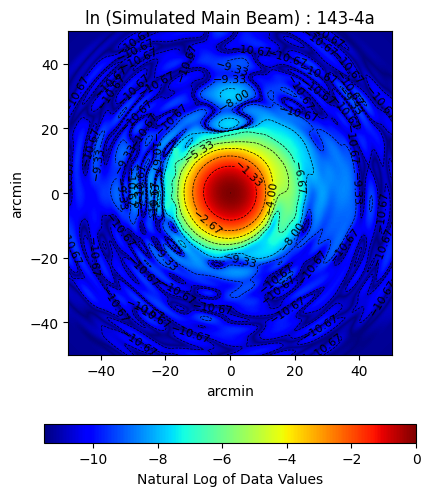

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Open the FITS file
file = "HFI_ScanBeam_143-1a_R2.00.fits"
hdulist = fits.open(file)

# Get the header and data
primary_header = hdulist[0].header
hdr = hdulist[0].header
data = hdulist[0].data

# Close the FITS file
hdulist.close()

# Apply natural logarithmic scaling to the data (handling negative or zero values)
log_data = np.log(np.abs(data) + 1e-5)  # Add small value to avoid log(0)

# Calculate the number of pixels
nx, ny = log_data.shape

# Define pixel size in arcminutes (2 arcseconds per pixel, 1 arcminute = 60 arcseconds)
pixel_size_arcmin = 2 / 60

# Calculate the number of pixels corresponding to 30 arcminutes (half of 60 arcmin)
arcmin_to_pixels = int(30 / pixel_size_arcmin)  # 30 arcminutes to pixels

# Calculate the central region (900x900 pixels)
x_center = nx // 2
y_center = ny // 2
trimmed_log_data = log_data[x_center - arcmin_to_pixels:x_center + arcmin_to_pixels, 
                            y_center - arcmin_to_pixels:y_center + arcmin_to_pixels]

# Calculate the new extent for the trimmed region
extent = [-50, 50, -50, 50]  # Extent in arcminutes for the central 60 arcmin region

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the trimmed data using imshow with proper scaling and the new extent in arcminutes
im = ax.imshow(trimmed_log_data, cmap='jet', origin='lower', extent=extent)

# Add contours to the plot with appropriate levels
contour_levels = np.linspace(-12, 0, 10)  # Adjust contour levels for natural log scaling
contours = ax.contour(trimmed_log_data, levels=contour_levels, colors='black', linewidths=0.5, extent=extent)

# Add labels to the contours
ax.clabel(contours, inline=True, fontsize=8)

# Set the labels and title
ax.set_xlabel('arcmin')
ax.set_ylabel('arcmin')
ax.set_title('ln (Simulated Main Beam) : 143-4a')

# Add a colorbar with appropriate scaling
cbar = plt.colorbar(im, ax=ax, shrink=0.8, location='bottom')
cbar.set_label('Natural Log of Data Values')

# Set colorbar limits (match the desired scale)
# im.set_clim(-12, 0)

# Show the plot
plt.show()


0.0009993424882289927

In [23]:
def radians_to_arcseconds(radians):
  """Converts radians to arcseconds.

  Args:
    radians: The angle in radians.

  Returns:
    The angle in arcseconds.
  """

  return radians * 206264.80624709636/60

In [24]:
radians_to_arcseconds(np.sqrt(4*np.pi/(12*1024*1024)))

3.435486411817406